In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

from joblib import dump, load

In [7]:
df =pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [8]:
df_tmp =df.copy()

In [9]:
df.shape

(426880, 26)

In [10]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [11]:
df.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


In [12]:
# basic cleaning (outliers)
df[df['price']<1000].shape[0]

46315

In [13]:
df[df['price']>100000].shape[0]

655

In [14]:
# removing
df = df[df['price']>1000]
df = df[df['price']<100000]

In [15]:
df.shape

(378659, 26)

In [16]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1162
manufacturer     14795
model             4305
condition       142533
cylinders       154532
fuel              2587
odometer          2071
title_status      6551
transmission      1808
VIN             144948
drive           114412
size            271951
type             80496
paint_color     108018
image_url           59
description         61
county          378659
state                0
lat               3446
long              3446
posting_date        59
dtype: int64

### EDA

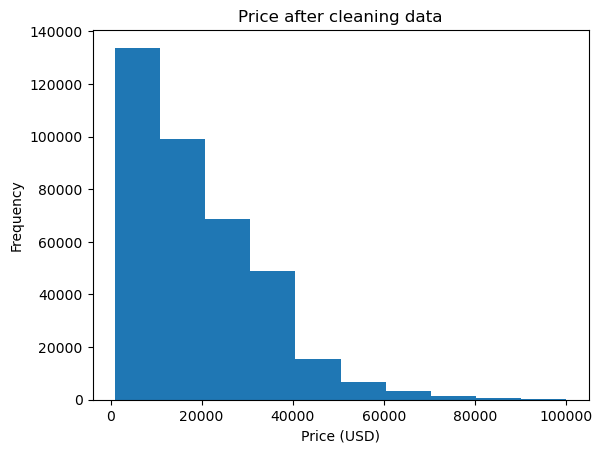

In [17]:
fig, ax =plt.subplots()
ax.hist(df['price'], bins =10)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Price after cleaning data')

plt.show()

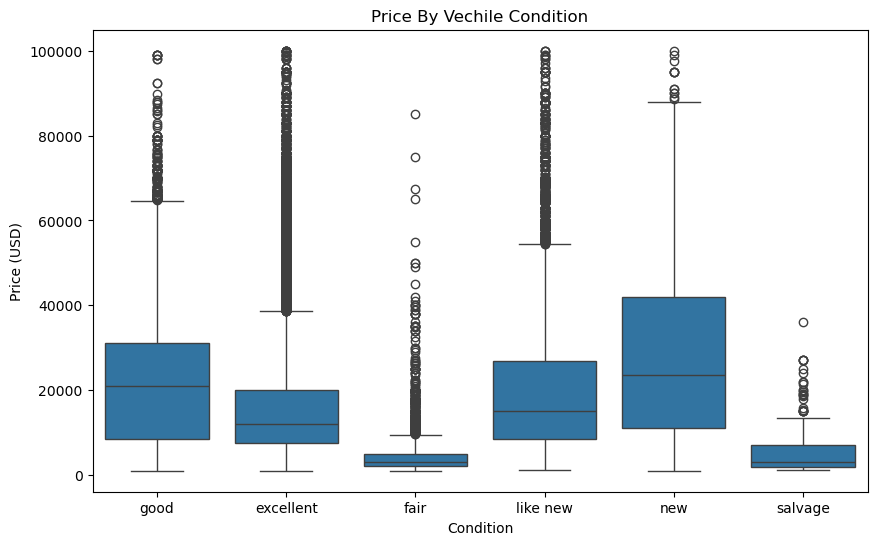

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'condition', y ='price')
plt.ylabel('Price (USD)')
plt.xlabel('Condition')
plt.title('Price By Vechile Condition')
plt.show()

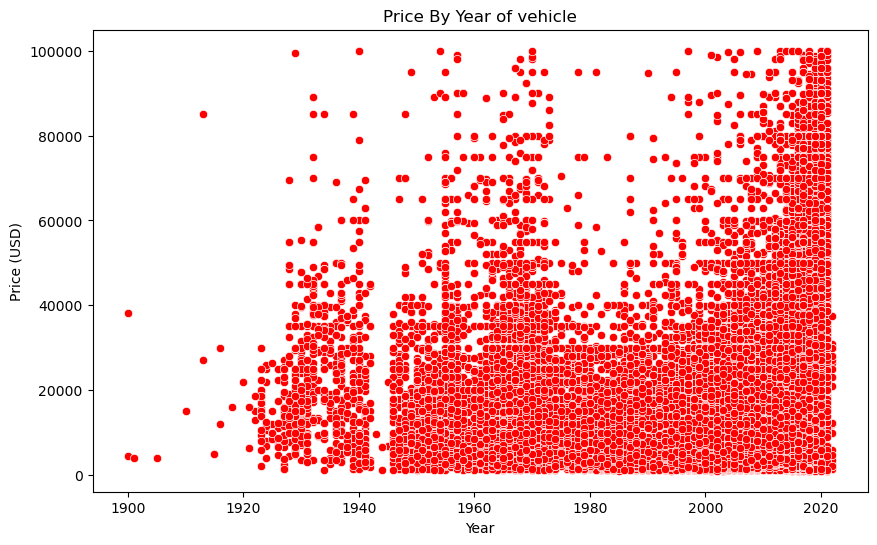

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'year', y ='price', alpha = 1, c='r')
plt.ylabel('Price (USD)')
plt.xlabel('Year')
plt.title('Price By Year of vehicle')
plt.show()

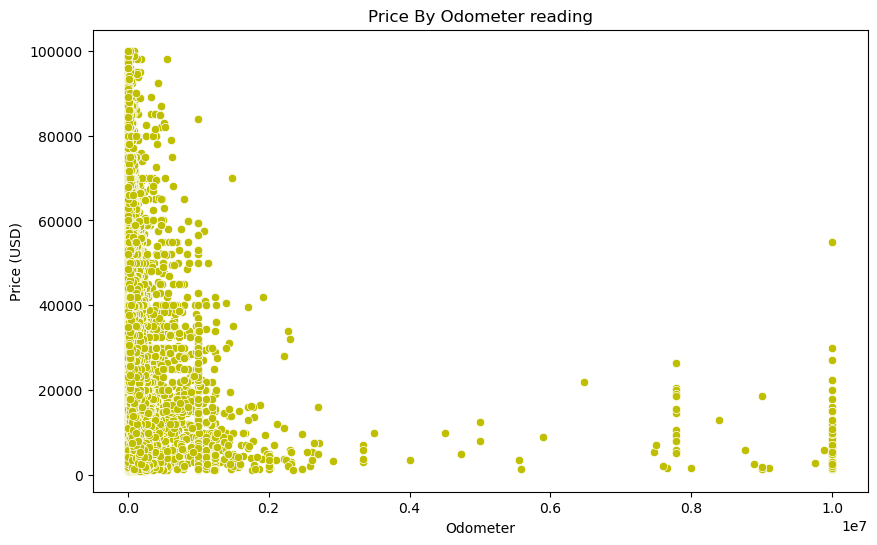

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'odometer', y ='price', alpha = 1, c='y')
plt.ylabel('Price (USD)')
plt.xlabel('Odometer')
plt.title('Price By Odometer reading')
plt.show()

In [21]:
# only for numeric
# corr_mat = df.corr()
# fig, ax =plt.subplots()
# ax = sns.heatmap(corr_mat, annot =True)
# pli.show()

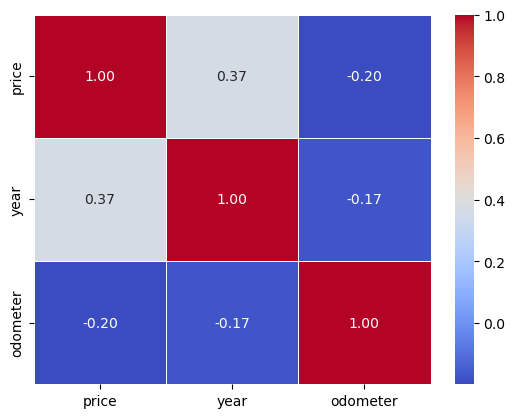

In [22]:
corr_mat = df[['price','year','odometer']].corr()
fig, ax =plt.subplots()
ax = sns.heatmap(corr_mat, annot =True, cmap = 'coolwarm', linewidth = 0.5, fmt = '.2f')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378659 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            378659 non-null  int64  
 1   url           378659 non-null  object 
 2   region        378659 non-null  object 
 3   region_url    378659 non-null  object 
 4   price         378659 non-null  int64  
 5   year          377497 non-null  float64
 6   manufacturer  363864 non-null  object 
 7   model         374354 non-null  object 
 8   condition     236126 non-null  object 
 9   cylinders     224127 non-null  object 
 10  fuel          376072 non-null  object 
 11  odometer      376588 non-null  float64
 12  title_status  372108 non-null  object 
 13  transmission  376851 non-null  object 
 14  VIN           233711 non-null  object 
 15  drive         264247 non-null  object 
 16  size          106708 non-null  object 
 17  type          298163 non-null  object 
 18  paint_col

# 1.we want our all data to be numeric
## converting object to category
- from string(obj) to category
- from no string(obj) to category

In [24]:
pd.api.types.is_string_dtype(df['model'])

False

In [25]:
# find the column contain strings(obj)
for label ,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

url
region
region_url
state


In [26]:
# converting string(obj) to category
for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378659 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            378659 non-null  int64   
 1   url           378659 non-null  category
 2   region        378659 non-null  category
 3   region_url    378659 non-null  category
 4   price         378659 non-null  int64   
 5   year          377497 non-null  float64 
 6   manufacturer  363864 non-null  object  
 7   model         374354 non-null  object  
 8   condition     236126 non-null  object  
 9   cylinders     224127 non-null  object  
 10  fuel          376072 non-null  object  
 11  odometer      376588 non-null  float64 
 12  title_status  372108 non-null  object  
 13  transmission  376851 non-null  object  
 14  VIN           233711 non-null  object  
 15  drive         264247 non-null  object  
 16  size          106708 non-null  object  
 17  type          298163 non-null  obj

In [28]:
# if data is not string
obj_cols = df.select_dtypes(include = 'object').columns
obj_cols

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'posting_date'],
      dtype='object')

In [29]:
for col in obj_cols:
    df[col] = df[col].astype('category').cat.as_ordered()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378659 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            378659 non-null  int64   
 1   url           378659 non-null  category
 2   region        378659 non-null  category
 3   region_url    378659 non-null  category
 4   price         378659 non-null  int64   
 5   year          377497 non-null  float64 
 6   manufacturer  363864 non-null  category
 7   model         374354 non-null  category
 8   condition     236126 non-null  category
 9   cylinders     224127 non-null  category
 10  fuel          376072 non-null  category
 11  odometer      376588 non-null  float64 
 12  title_status  372108 non-null  category
 13  transmission  376851 non-null  category
 14  VIN           233711 non-null  category
 15  drive         264247 non-null  category
 16  size          106708 non-null  category
 17  type          298163 non-null  cat

In [31]:
df.state.cat.categories

Index(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi',
       'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn',
       'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh',
       'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa',
       'wi', 'wv', 'wy'],
      dtype='object')

# 2. Filling the missing values
- numeric value
- non numeric value

## Step 1.

In [32]:
# checking for numeric value
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

id
price
year
odometer
county
lat
long


## step2

In [33]:
# checking for null numeric value
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

year
odometer
county
lat
long


# step 3

In [34]:
# filling up numeric value with median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column which tells us if data was missing
            df[label+'is_missing'] = pd.isnull(content)
            # fill value with medain
            df[label] = content.fillna(content.median())

In [35]:
df['county'].isna().sum()

np.int64(378659)

In [36]:
df.isna().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
year                       0
manufacturer           14795
model                   4305
condition             142533
cylinders             154532
fuel                    2587
odometer                   0
title_status            6551
transmission            1808
VIN                   144948
drive                 114412
size                  271951
type                   80496
paint_color           108018
image_url                 59
description               61
county                378659
state                      0
lat                        0
long                       0
posting_date              59
yearis_missing             0
odometeris_missing         0
countyis_missing           0
latis_missing              0
longis_missing             0
dtype: int64

### Step 1

In [37]:
# for categorical values(non numeric) to numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

url
region
region_url
manufacturer
model
condition
cylinders
fuel
title_status
transmission
VIN
drive
size
type
paint_color
image_url
description
state
posting_date


### step2

In [38]:
# turning up and filling the values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # bianey for so we know
        df[label+'is_null'] = pd.isnull(content)
        # turn category to number in codes +1
        df[label] = pd.Categorical(content).codes +1

In [39]:
df.isna().sum()

id                          0
url                         0
region                      0
region_url                  0
price                       0
year                        0
manufacturer                0
model                       0
condition                   0
cylinders                   0
fuel                        0
odometer                    0
title_status                0
transmission                0
VIN                         0
drive                       0
size                        0
type                        0
paint_color                 0
image_url                   0
description                 0
county                 378659
state                       0
lat                         0
long                        0
posting_date                0
yearis_missing              0
odometeris_missing          0
countyis_missing            0
latis_missing               0
longis_missing              0
urlis_null                  0
regionis_null               0
region_url

In [40]:
df['county'].dtype

dtype('float64')

In [41]:
## county is totally null lets remove it
df = df.drop('county',axis =1)

In [42]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'yearis_missing', 'odometeris_missing', 'countyis_missing',
       'latis_missing', 'longis_missing', 'urlis_null', 'regionis_null',
       'region_urlis_null', 'manufactureris_null', 'modelis_null',
       'conditionis_null', 'cylindersis_null', 'fuelis_null',
       'title_statusis_null', 'transmissionis_null', 'VINis_null',
       'driveis_null', 'sizeis_null', 'typeis_null', 'paint_coloris_null',
       'image_urlis_null', 'descriptionis_null', 'stateis_null',
       'posting_dateis_null'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378659 entries, 0 to 426879
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   378659 non-null  int64  
 1   url                  378659 non-null  int32  
 2   region               378659 non-null  int16  
 3   region_url           378659 non-null  int16  
 4   price                378659 non-null  int64  
 5   year                 378659 non-null  float64
 6   manufacturer         378659 non-null  int8   
 7   model                378659 non-null  int16  
 8   condition            378659 non-null  int8   
 9   cylinders            378659 non-null  int8   
 10  fuel                 378659 non-null  int8   
 11  odometer             378659 non-null  float64
 12  title_status         378659 non-null  int8   
 13  transmission         378659 non-null  int8   
 14  VIN                  378659 non-null  int32  
 15  drive                3

In [44]:
len(df)

378659

In [45]:
np.shape(df)

(378659, 49)

In [46]:
np.random.seed(7)
x = df.drop(columns=['price', 'id', 'url', 'region_url', 'description','image_url', 'VIN','posting_date'])
y = df['price']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 7, shuffle =True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 7, shuffle = True)

# `For the use of liner regression we should use onehotencoder`

In [47]:
def evaluate_metrics(y_true, y_pred):
    mse =mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R^2: {r2:.3f}')

    return {'rmse':rmse, 'mae': mae, 'r2': r2}

In [79]:
%%time
param_grid = {'n_estimators': [100,200,300],
              'max_depth': [None, 10,20,30],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10]}

rf = RandomForestRegressor(random_state = 42)
rs_rf = RandomizedSearchCV(estimator = rf,
                           n_iter = 20,
                           cv = 3,
                           verbose = 2,
                           random_state = 42,
                           n_jobs = -1,
                           scoring = 'neg_root_mean_squared_error',
                           param_distributions = param_grid)

rs_rf.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
CPU times: total: 1min 47s
Wall time: 9min 47s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [88]:
best_rf1 = rs_rf.best_estimator_
best_rf1

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=200,
                      random_state=42)

In [87]:
best_rf =rs_rf.best_params_
best_rf

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30}

In [90]:
# applying on valid
y_pred_valid = best_rf1.predict(x_valid)
y_pred_valid

array([19089.58759058,  7472.1609372 , 24553.43108308, ...,
       10057.65797708,  5140.04199635,  5847.92794594], shape=(60586,))

In [93]:
metrics_valid = evaluate_metrics(y_valid, y_pred_valid)
metrics_valid

RMSE: 4695.48
MAE: 22047569.11
R^2: 0.893


{'rmse': np.float64(4695.4839060249915),
 'mae': 22047569.11173971,
 'r2': 0.8927734688897214}

In [94]:
# applying on test
y_pred_test = best_rf1.predict(x_test)
y_pred_test

array([16390.19      , 51240.8735    , 27573.13409091, ...,
       36614.66868295, 16946.455     , 13229.        ], shape=(75732,))

In [95]:
metrics_test = evaluate_metrics(y_test, y_pred_test)
metrics_test

RMSE: 4559.63
MAE: 20790218.51
R^2: 0.898


{'rmse': np.float64(4559.629207835295),
 'mae': 20790218.51294472,
 'r2': 0.8978041569177304}

# Trying Different model
### XGBoost

In [48]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective = 'reg:squarederror', n_jobs=-1, random_state=42)
xgb_param_grid ={
    'n_estimators':[100,200,300],
    'max_depth':[3,6,10],
    'learning_rate':[0.01,0.05,0.1,0.02],
    'subsample':[0.7,0.8,1],
    'colsample_bytree':[0.7,0.8,1]
}

rs_xgb = RandomizedSearchCV(
    xgb_model,
    xgb_param_grid,
    n_iter = 10,
    cv = 3,
    verbose =2,
    n_jobs = -1,
    random_state = 42
)
rs_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.02],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1]},
                   random_state=42, verbose=2)

In [50]:
best_xgb = rs_xgb.best_estimator_
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, ...)

In [52]:
y_pred_valid_xgb = best_xgb.predict(x_valid)
y_pred_valid_xgb

array([11116.634 ,  8301.722 , 26283.434 , ..., 11392.414 ,  3867.0889,
        2977.102 ], shape=(60586,), dtype=float32)

In [53]:
metrics_valid_xgb = evaluate_metrics(y_valid, y_pred_valid_xgb)
metrics_valid_xgb

RMSE: 4587.97
MAE: 21049476.00
R^2: 0.898


{'rmse': np.float64(4587.970793281056),
 'mae': 21049476.0,
 'r2': 0.897627592086792}

In [54]:
y_pred_test_xgb = best_xgb.predict(x_test)
y_pred_test_xgb

array([17608.809, 47674.156, 30422.244, ..., 37725.516, 14392.185,
       13369.399], shape=(75732,), dtype=float32)

In [56]:
metrics_test_xgb = evaluate_metrics(y_test, y_pred_test_xgb)
metrics_test_xgb

RMSE: 4514.42
MAE: 20379952.00
R^2: 0.900


{'rmse': np.float64(4514.416019819175),
 'mae': 20379952.0,
 'r2': 0.899820864200592}

# `so our best model is xgboost(slightly)`

In [2]:
import joblib
joblib.dump(best_rf,'best_randomforest_model.joblib')

NameError: name 'best_rf' is not defined

In [3]:
joblib.dump(best_xgb, 'best_xgboost_model.joblib')

NameError: name 'best_xgb' is not defined

In [4]:
loaded_rf = joblib.load('best_randomforest_model.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'best_randomforest_model.joblib'

In [5]:
loaded_xgb = joblib.load('best_xgboost_model.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'best_xgboost_model.joblib'